In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [7]:
df = pd.read_csv("C:\\Users\\UMUT\\Desktop\\python-projects-20230501T194411Z-001\\python-projects\\train.csv")

In [8]:
labels = df.label

In [9]:
data = df.drop("label",axis=1)

In [10]:
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
print(data.shape)


(42000, 784)


In [12]:
print(labels.shape)

(42000,)


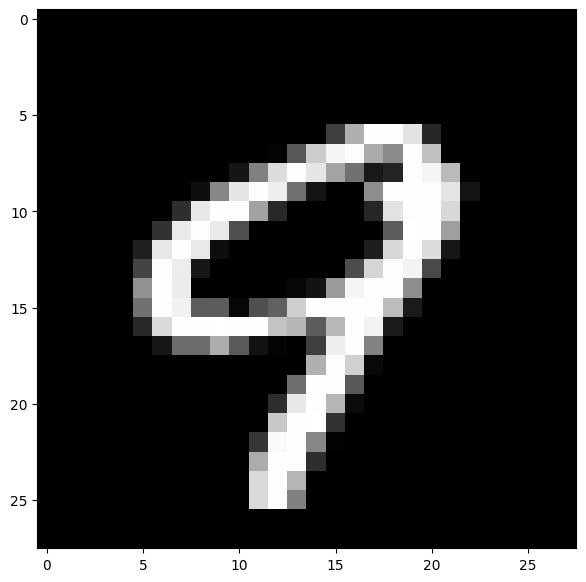

9


In [13]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 100

grid_data = data.iloc[idx].values.reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(labels[idx])

2D Visualization using PCA 

In [14]:
print("the shape of the data sample: ", data.shape)

the shape of the data sample:  (42000, 784)


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
standartData = StandardScaler().fit_transform(data)

In [17]:
print(standartData.shape)

(42000, 784)


In [18]:
sampleData = standartData

In [19]:
covarianceMatrix = np.matmul(sampleData.T,sampleData)

In [20]:
print(covarianceMatrix.shape)

(784, 784)


In [21]:
from scipy.linalg import eigh

In [22]:
values, vectors = eigh(covarianceMatrix,eigvals=(782,783))

C:\Users\UMUT\AppData\Local\Temp\ipykernel_17452\2478419502.py:1: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values, vectors = eigh(covarianceMatrix,eigvals=(782,783))


In [23]:
print("shape of eigen vectors: ",vectors.shape)

shape of eigen vectors:  (784, 2)


In [24]:
vectors = vectors.T

In [25]:
print("updated shapes of eigen vectors: ",vectors.shape)

updated shapes of eigen vectors:  (2, 784)


In [26]:
import matplotlib.pyplot as plt 

In [27]:
newCoordinates = np.matmul(vectors,sampleData.T)

In [28]:
print (" resultanat new data points' shape ", vectors.shape, "X", sampleData.T.shape," = ", newCoordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 42000)  =  (2, 42000)


In [29]:
import pandas as pd 

In [30]:
new_coordinates = np.vstack((newCoordinates, labels)).T

In [31]:
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


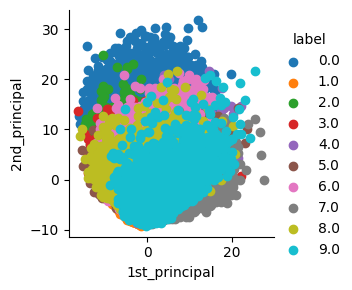

In [33]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="label").map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [34]:
from sklearn import decomposition

In [35]:
pca = decomposition.PCA()

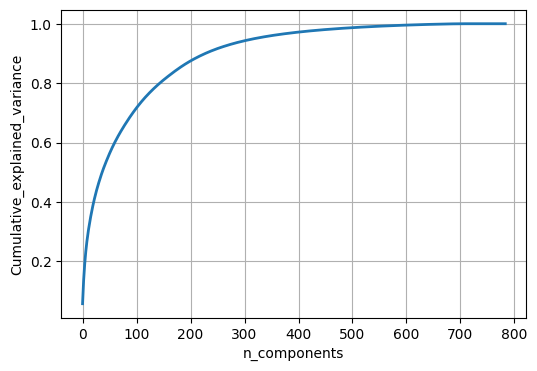

In [36]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pcaData = pca.fit_transform(sampleData)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


This means that %90 of variance can be explanied with 200 dimensions

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(standartData,labels)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier()

In [41]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [42]:
y_pred = knn.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy = accuracy_score(y_pred,y_test)

In [45]:
print(accuracy)

0.9332380952380952


In [46]:
y_pred

array([3, 0, 6, ..., 3, 2, 1], dtype=int64)

In [47]:
pcax_train, pcax_test, pcay_train, pcay_test = train_test_split(pcaData,labels)

In [48]:
knnPCA = KNeighborsClassifier()

In [49]:
knnPCA.fit(pcax_train,pcay_train)

KNeighborsClassifier()

In [50]:
pcaPred = knnPCA.predict(pcax_test)

In [51]:
pcaAccuracy = accuracy_score(pcaPred,pcay_test)

In [52]:
print(pcaAccuracy)

0.9334285714285714
